## Xeducation Leads
<font color = blue> The objective of this case study is to perform EDA and build a Logistic Regression Model on the dataset of Xeducation, an online education company with leads it has that can be converted to actual subscribers/customers. </font>

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset
leads_df = pd.read_csv('leads.csv')

In [4]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# NOTE:
#1. 7 NUMERICAL AND 30 CATEGORICAL VARIABLES
#2. TOTAL 9240 ROWS AND 37 COLUMNS
#3. MANY ROWS & COLUMNS WILL REQUIRE IMPUTATIONS OR DELETION

In [7]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#NOTE
#1. Lead number is assigned to each procured lead however Prospect ID uniquely identifies the customer so one of them is redundant.
#2. Converted is our target variable however mean indicates 38.5 % have converted.

In [9]:
leads_df['Prospect ID'].nunique()

9240

In [10]:
leads_df['Lead Number'].nunique()

9240

In [11]:
#deleting prospect ID as it is redundant
leads_df = leads_df.drop(['Prospect ID'], 1)

In [12]:
#finding unique value
for i in leads_df.columns:
    print(i,' = ', leads_df[i].nunique())

Lead Number  =  9240
Lead Origin  =  5
Lead Source  =  21
Do Not Email  =  2
Do Not Call  =  2
Converted  =  2
TotalVisits  =  41
Total Time Spent on Website  =  1731
Page Views Per Visit  =  114
Last Activity  =  17
Country  =  38
Specialization  =  19
How did you hear about X Education  =  10
What is your current occupation  =  6
What matters most to you in choosing a course  =  3
Search  =  2
Magazine  =  1
Newspaper Article  =  2
X Education Forums  =  2
Newspaper  =  2
Digital Advertisement  =  2
Through Recommendations  =  2
Receive More Updates About Our Courses  =  1
Tags  =  26
Lead Quality  =  5
Update me on Supply Chain Content  =  1
Get updates on DM Content  =  1
Lead Profile  =  6
City  =  7
Asymmetrique Activity Index  =  3
Asymmetrique Profile Index  =  3
Asymmetrique Activity Score  =  12
Asymmetrique Profile Score  =  10
I agree to pay the amount through cheque  =  1
A free copy of Mastering The Interview  =  2
Last Notable Activity  =  16


In [13]:
# finding columns with only one type of entry
del_list = []
for i in leads_df.columns:
    if leads_df[i].nunique() == 1:
        del_list.append(i)
print(del_list)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [14]:
for i in del_list:
    print(leads_df[i].unique())

['No']
['No']
['No']
['No']
['No']


In [15]:
#deleting above columns
leads_df = leads_df.drop(del_list, 1)

In [16]:
ten_variables = []
for i in leads_df.columns:
    if leads_df[i].nunique() <= 10:
        ten_variables.append(i)
        print(i, '=', leads_df[i].unique())

Lead Origin = ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Do Not Email = ['No' 'Yes']
Do Not Call = ['No' 'Yes']
Converted = [0 1]
How did you hear about X Education = ['Select' 'Word Of Mouth' 'Other' nan 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS']
What is your current occupation = ['Unemployed' 'Student' nan 'Working Professional' 'Businessman' 'Other'
 'Housewife']
What matters most to you in choosing a course = ['Better Career Prospects' nan 'Flexibility & Convenience' 'Other']
Search = ['No' 'Yes']
Newspaper Article = ['No' 'Yes']
X Education Forums = ['No' 'Yes']
Newspaper = ['No' 'Yes']
Digital Advertisement = ['No' 'Yes']
Through Recommendations = ['No' 'Yes']
Lead Quality = ['Low in Relevance' nan 'Might be' 'Not Sure' 'Worst' 'High in Relevance']
Lead Profile = ['Select' 'Potential Lead' nan 'Other Leads' 'Lateral Student'
 'Dual Specialization Student' 'Student of SomeSchool'

In [17]:
# From above data, we have some columns with values 'select' and nan.
for i in ten_variables:
    print(leads_df[i].value_counts(normalize = True, dropna = False))

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64
No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64
0    0.61461
1    0.38539
Name: Converted, dtype: float64
Select                   0.545779
NaN                      0.238853
Online Search            0.087446
Word Of Mouth            0.037662
Student of SomeSchool    0.033550
Other                    0.020130
Multiple Sources         0.016450
Advertisements           0.007576
Social Media             0.007251
Email                    0.002814
SMS                      0.002489
Name: How did you hear about X Education, dtype: float64
Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732

In [18]:
#NOTE:
# 'How did you hear about X Education' COL HAS 78% OF VALUES SELECT OR NAN. so WE'LL DELETE THIS
# 'What is your current occupation' HAS 30% NAN VALUES. WE'LL IMPUTE IT WITH 'other'
# 'What matters most to you in choosing a course' HAS 30% NAN VALUES. WE'LL IMPUTE IT WITH 'other'
# 'Lead Quality' 51% VALUES ARE NAN. so WE'LL DELETE THIS.
# 'Lead Profile' HAS 30% NAN VALUES and 44% select. WE'LL delete it.
# 'City' HAS 39% SELECT OR NAN. WE'LL delete it.
# ALL COLUMNS WITH ASYMMETRIC XX HAVE 45% NAN. SO WE'LL DELETE ALL 3.
# Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations Do Not call - all have no variance.
 # So, we'll delete them.

In [19]:
del_list2 = ['How did you hear about X Education', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score', 'Do Not Call',
            'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Lead Quality', 'Lead Profile','City', 'Through Recommendations']

In [20]:
leads_df = leads_df.drop(del_list2, 1)

In [21]:
#imputing nan with 'Other'
nan_list = ['What is your current occupation', 'What matters most to you in choosing a course']

In [22]:
leads_df.loc[:,nan_list] = leads_df.loc[:,nan_list].fillna(value = 'Other')

In [23]:
#We define a function so that if values are smaller than 8%, all of them will be replaced with 'Other'
def merger_of_small_val(df):
    my_df = pd.DataFrame(df.value_counts(normalize = True, dropna = False))
    to_merge_as_other = my_df.index[my_df.iloc[:,0]<0.08]
    small_percent_list = list(to_merge_as_other)
    return small_percent_list

In [24]:
pass_df = leads_df.copy()
for i in ten_variables:
    if i in leads_df.columns:
        small_percent_list = merger_of_small_val(pass_df[i])
        if len(small_percent_list) != 0:
            leads_df.loc[:,i] = leads_df.loc[:,i].replace(to_replace=small_percent_list, value='Other')

In [25]:
for i in ten_variables:
    if i in leads_df.columns:
        print(leads_df[i].value_counts(normalize = True, dropna = False))

Landing Page Submission    0.528788
API                        0.387446
Other                      0.083766
Name: Lead Origin, dtype: float64
No       0.920563
Other    0.079437
Name: Do Not Email, dtype: float64
0    0.61461
1    0.38539
Name: Converted, dtype: float64
Unemployed    0.606061
Other         0.393939
Name: What is your current occupation, dtype: float64
Better Career Prospects    0.706494
Other                      0.293506
Name: What matters most to you in choosing a course, dtype: float64
No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64


In [26]:
# now variables having more than 10 unique values
more_ten_variables = []
for i in leads_df.columns:
    if leads_df[i].nunique() in range(11, 100):
        more_ten_variables.append(i)
        print(i, '=', leads_df[i].unique())

Lead Source = ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
TotalVisits = [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
Last Activity = ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
Country = [nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United 

In [27]:
for i in more_ten_variables:
    if i in leads_df.columns:
        print(leads_df[i].value_counts(normalize = True, dropna = False))

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Social Media         0.000216
Press_Release        0.000216
Live Chat            0.000216
testone              0.000108
NC_EDM               0.000108
youtubechannel       0.000108
blog                 0.000108
welearnblog_Home     0.000108
Pay per Click Ads    0.000108
WeLearn              0.000108
Name: Lead Source, dtype: float64
0.0      0.236905
2.0      0.181818
3.0      0.141342
4.0      0.121212
5.0      0.084740
6.0      0.050433
1.0      0.042749
7.0      0.033442
8.0      0.024242
9.0      0.017749
NaN      0.014827
10.0     0.012338
11.0     0.009307
13.0     0.005195
12.0     0.004870
14.0     0.003896
16.0     0.002273


In [28]:
#NOTE 
# 1. Lead Source, Last Activity, Country, Last Notable Activity has many small percentage values so,
#                                                           we'll merge values less than 8% as other
# 2. TotalVisits is numerical we'll delete NaN in it 1.5% and scale it later.
# 3. Specialization, Tags, Asymmetrique Activity Score has more than 36% values select or Nan so we'll delete it
# 4. Also NaN in country will be replaced with unknown

In [29]:
# deletion
del_list3 = ['Specialization', 'Tags', 'Asymmetrique Activity Score']

In [30]:
leads_df = leads_df.drop(del_list3, 1)

In [31]:
#We define a function so that if values are smaller than 8%, all of them will be replaced with 'Other'
merge_list = ['Lead Source', 'Last Activity', 'Country', 'Last Notable Activity']

In [32]:
for i in merge_list:
    if i in leads_df.columns:
        small_percent_list = merger_of_small_val(leads_df[i])
        if len(small_percent_list) != 0:
            leads_df.loc[:,i] = leads_df.loc[:,i].replace(to_replace=small_percent_list, value='Other')

In [33]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Other,NaN,Unemployed,Better Career Prospects,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Other,Better Career Prospects,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other,India,Unemployed,Better Career Prospects,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Other,India,Unemployed,Better Career Prospects,No,Modified


In [34]:
# filling NaN with unknown in country col
leads_df.loc[:,'Country'] = leads_df.loc[:,'Country'].fillna(value = 'unknown')

In [35]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [36]:
#deleting rest of NaN
#deleting NaN from TotalVisits and Page Views per visit
leads_df = leads_df.dropna()

In [37]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Origin                                    9103 non-null   object 
 2   Lead Source                                    9103 non-null   object 
 3   Do Not Email                                   9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

In [38]:
#We change datatype to int64
leads_df['TotalVisits'] = leads_df['TotalVisits'].astype('int64')

In [39]:
leads_df['Page Views Per Visit'] = leads_df['Page Views Per Visit'].astype('int64')

In [40]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Number                                    9103 non-null   int64 
 1   Lead Origin                                    9103 non-null   object
 2   Lead Source                                    9103 non-null   object
 3   Do Not Email                                   9103 non-null   object
 4   Converted                                      9103 non-null   int64 
 5   TotalVisits                                    9103 non-null   int64 
 6   Total Time Spent on Website                    9103 non-null   int64 
 7   Page Views Per Visit                           9103 non-null   int64 
 8   Last Activity                                  9103 non-null   object
 9   Country                                        9103 non-null   

In [41]:
# Our data is clean to some extent
# Let's check for outliers now

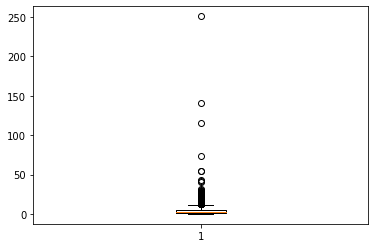

In [42]:
plt.boxplot(leads_df.TotalVisits)
plt.show()

In [43]:
leads_df[leads_df.TotalVisits > 25].shape

(22, 14)

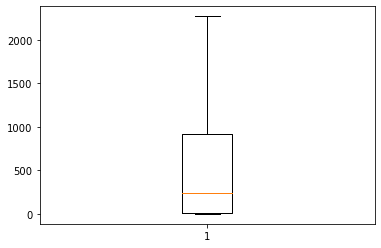

In [44]:
plt.boxplot(leads_df['Total Time Spent on Website'])
plt.show()

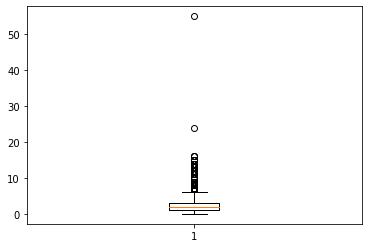

In [45]:
plt.boxplot(leads_df['Page Views Per Visit'])
plt.show()

In [46]:
leads_df[leads_df['Page Views Per Visit'] >= 10].shape

(75, 14)

In [47]:
# 22 outliers for TotalVisits (considering 25 as cutoff)
# no outliers in Total Time Spent on Website
# 50 outliers for Page Views Per Visit (considering 10 as cutoff)
leads_df = leads_df[leads_df.TotalVisits <= 25]
leads_df = leads_df[leads_df['Page Views Per Visit'] <= 10]

In [48]:
leads_df.shape

(9035, 14)

In [49]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9035 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Number                                    9035 non-null   int64 
 1   Lead Origin                                    9035 non-null   object
 2   Lead Source                                    9035 non-null   object
 3   Do Not Email                                   9035 non-null   object
 4   Converted                                      9035 non-null   int64 
 5   TotalVisits                                    9035 non-null   int64 
 6   Total Time Spent on Website                    9035 non-null   int64 
 7   Page Views Per Visit                           9035 non-null   int64 
 8   Last Activity                                  9035 non-null   object
 9   Country                                        9035 non-null   

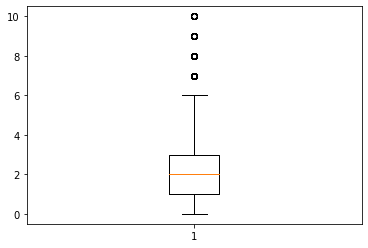

In [50]:
plt.boxplot(leads_df['Page Views Per Visit'])
plt.show()

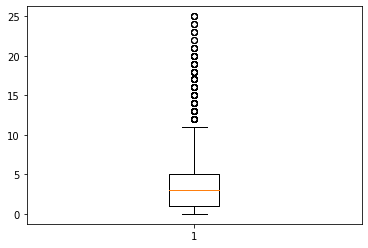

In [51]:
plt.boxplot(leads_df.TotalVisits)
plt.show()

In [52]:
# Creating dummy variables for categorical variables

In [53]:
leads_df['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Other'], dtype=object)

In [54]:
# Lead Origin
lo = pd.get_dummies(leads_df['Lead Origin'], prefix='Lead Origin')
lo1 = lo.drop(['Lead Origin_Other'], 1)
leads_df = pd.concat([leads_df,lo1], axis=1)

In [55]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission
0,660737,API,Olark Chat,No,0,0,0,0,Other,unknown,Unemployed,Better Career Prospects,No,Modified,1,0
1,660728,API,Organic Search,No,0,5,674,2,Email Opened,India,Unemployed,Better Career Prospects,No,Email Opened,1,0
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,India,Other,Better Career Prospects,Yes,Email Opened,0,1
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,Other,India,Unemployed,Better Career Prospects,No,Modified,0,1
4,660681,Landing Page Submission,Google,No,1,2,1428,1,Other,India,Unemployed,Better Career Prospects,No,Modified,0,1


In [56]:
leads_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Other'], dtype=object)

In [57]:
#Lead Source
ls = pd.get_dummies(leads_df['Lead Source'], prefix='Lead Source')
ls1 = ls.drop(['Lead Source_Other'], 1)
leads_df = pd.concat([leads_df,ls1], axis=1)

In [58]:
leads_df['Do Not Email'].unique()

array(['No', 'Other'], dtype=object)

In [59]:
#Do Not Email
ls = pd.get_dummies(leads_df['Do Not Email'], prefix='Do Not Email')
ls1 = ls.drop(['Do Not Email_Other'], 1)
leads_df = pd.concat([leads_df,ls1], axis=1)

In [60]:
#Last Activity
leads_df['Last Activity'].unique()

array(['Other', 'Email Opened', 'Olark Chat Conversation', 'SMS Sent'],
      dtype=object)

In [61]:
ls = pd.get_dummies(leads_df['Last Activity'], prefix='Last Activity')
ls1 = ls.drop(['Last Activity_Other'], 1)
leads_df = pd.concat([leads_df,ls1], axis=1)

In [62]:
#Country
leads_df['Country'].unique()

array(['unknown', 'India', 'Other'], dtype=object)

In [63]:
ls = pd.get_dummies(leads_df['Country'], prefix='Country')
ls1 = ls.drop(['Country_unknown'], 1)
leads_df = pd.concat([leads_df,ls1], axis=1)

In [64]:
#What is your current occupation
leads_df['What is your current occupation'].unique()

array(['Unemployed', 'Other'], dtype=object)

In [65]:
ls = pd.get_dummies(leads_df['What is your current occupation'], prefix='Occupation')
ls1 = ls.drop(['Occupation_Other'], 1)
leads_df = pd.concat([leads_df,ls1], axis=1)

In [66]:
#What matters most to you in choosing a course
leads_df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', 'Other'], dtype=object)

In [67]:
ls = pd.get_dummies(leads_df['What matters most to you in choosing a course'], prefix='Course_objective')
ls1 = ls.drop(['Course_objective_Other'], 1)
leads_df = pd.concat([leads_df,ls1], axis=1)

In [68]:
#A free copy of Mastering The Interview
leads_df['A free copy of Mastering The Interview'].unique()

array(['No', 'Yes'], dtype=object)

In [69]:
ls = pd.get_dummies(leads_df['A free copy of Mastering The Interview'], prefix='Interview_guide')
ls1 = ls.drop(['Interview_guide_No'], 1)
leads_df = pd.concat([leads_df,ls1], axis=1)

In [70]:
#Last Notable Activity
leads_df['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Other', 'SMS Sent'], dtype=object)

In [71]:
ls = pd.get_dummies(leads_df['Last Notable Activity'], prefix='Last Notable Activity')
ls1 = ls.drop(['Last Notable Activity_Other'], 1)
leads_df = pd.concat([leads_df,ls1], axis=1)

In [72]:
leads_df.shape

(9035, 32)

In [73]:
#Dropping repetative columns for which dummy has been created

In [74]:
del_list_dummycopy = ['Lead Origin','Lead Source','Do Not Email','Last Activity','Country',
                      'What is your current occupation','What matters most to you in choosing a course',
                      'A free copy of Mastering The Interview','Last Notable Activity']

In [75]:
leads_df_before_dummy = leads_df.copy()

In [76]:
leads_df = leads_df.drop(del_list_dummycopy, 1)

In [77]:
leads_df.shape

(9035, 23)

In [78]:
leads_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,...,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_India,Country_Other,Occupation_Unemployed,Course_objective_Better Career Prospects,Interview_guide_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,660728,0,5,674,2,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,660727,1,2,1532,2,0,1,1,0,0,...,0,0,1,0,0,1,1,1,0,0
3,660719,0,1,305,1,0,1,1,0,0,...,0,0,1,0,1,1,0,0,1,0
4,660681,1,2,1428,1,0,1,0,1,0,...,0,0,1,0,1,1,0,0,1,0


In [79]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9035 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Lead Number                               9035 non-null   int64
 1   Converted                                 9035 non-null   int64
 2   TotalVisits                               9035 non-null   int64
 3   Total Time Spent on Website               9035 non-null   int64
 4   Page Views Per Visit                      9035 non-null   int64
 5   Lead Origin_API                           9035 non-null   uint8
 6   Lead Origin_Landing Page Submission       9035 non-null   uint8
 7   Lead Source_Direct Traffic                9035 non-null   uint8
 8   Lead Source_Google                        9035 non-null   uint8
 9   Lead Source_Olark Chat                    9035 non-null   uint8
 10  Lead Source_Organic Search                9035 non-null   ui

In [80]:
#resetting the index
leads_df.reset_index(drop = True)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,...,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_India,Country_Other,Occupation_Unemployed,Course_objective_Better Career Prospects,Interview_guide_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,660728,0,5,674,2,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,660727,1,2,1532,2,0,1,1,0,0,...,0,0,1,0,0,1,1,1,0,0
3,660719,0,1,305,1,0,1,1,0,0,...,0,0,1,0,1,1,0,0,1,0
4,660681,1,2,1428,1,0,1,0,1,0,...,0,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030,579564,1,8,1845,2,0,1,1,0,0,...,0,0,0,1,1,1,0,0,0,0
9031,579546,0,2,238,2,0,1,1,0,0,...,0,1,1,0,1,1,1,0,0,1
9032,579545,0,2,199,2,0,1,1,0,0,...,0,1,1,0,1,1,1,0,0,1
9033,579538,1,3,499,3,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,1


## Test - Train Split

In [81]:
# importing libraries
from sklearn.model_selection import train_test_split

In [82]:
# Putting feature variable to X
X = leads_df.drop(['Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Do Not Email_No,...,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_India,Country_Other,Occupation_Unemployed,Course_objective_Better Career Prospects,Interview_guide_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,0
1,5,674,2,1,0,0,0,0,1,1,...,0,0,1,0,1,1,0,1,0,0
2,2,1532,2,0,1,1,0,0,0,1,...,0,0,1,0,0,1,1,1,0,0
3,1,305,1,0,1,1,0,0,0,1,...,0,0,1,0,1,1,0,0,1,0
4,2,1428,1,0,1,0,1,0,0,1,...,0,0,1,0,1,1,0,0,1,0


In [83]:
# Putting response variable to y
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling for numeric variables

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
#Performing standardisation
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Do Not Email_No,...,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_India,Country_Other,Occupation_Unemployed,Course_objective_Better Career Prospects,Interview_guide_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
1253,-0.397063,-0.685611,-0.112838,0,1,0,1,0,0,0,...,0,0,1,0,1,1,0,0,1,0
4989,0.517146,-0.493623,-0.629559,0,1,1,0,0,0,1,...,0,1,1,0,1,1,0,0,0,1
7462,1.736090,-0.118789,3.504202,0,1,0,0,0,1,1,...,0,1,1,0,1,1,1,0,0,1
6357,-1.006535,-0.875770,-1.146279,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5515,-0.397063,-0.619786,-0.112838,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1


In [87]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Do Not Email_No,...,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_India,Country_Other,Occupation_Unemployed,Course_objective_Better Career Prospects,Interview_guide_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
count,6.324000e+03,6.324000e+03,6.324000e+03,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,...,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,-5.082027e-16,-6.790548e-17,-1.038596e-16,0.390259,0.537002,0.278305,0.320525,0.193074,0.121126,0.925364,...,0.108476,0.301866,0.712049,0.028937,0.603574,0.700980,0.311828,0.307559,0.362113,0.239564
std,1.000079e+00,1.000079e+00,1.000079e+00,0.487847,0.498668,0.448200,0.466715,0.394742,0.326299,0.262824,...,0.311005,0.459104,0.452844,0.167644,0.489194,0.457865,0.463277,0.461519,0.480649,0.426851
min,-1.006535e+00,-8.757704e-01,-1.146279e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.017990e-01,-8.666281e-01,-6.295585e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.232676e-02,-4.387688e-01,-1.128385e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.171455e-01,7.936124e-01,4.038816e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,6.611868e+00,3.278488e+00,4.020922e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
# Conversion rate of 38%
leads_df.Converted.value_counts(normalize = True)

0    0.61959
1    0.38041
Name: Converted, dtype: float64

## Correlations

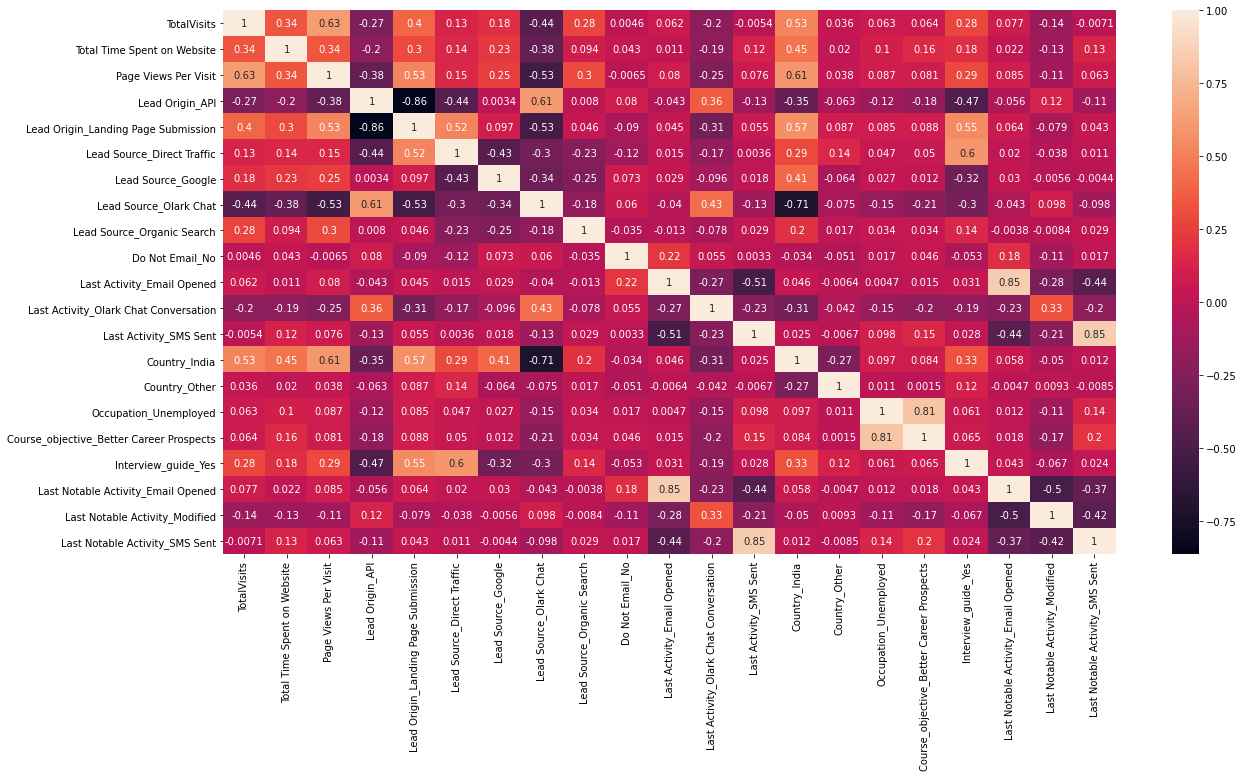

In [89]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [90]:
# We'll drop highly correlated (>|0.7|) variables from both train and test
del_list_correlated = ['Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat', 'Last Notable Activity_Email Opened']

In [91]:
X_train = X_train.drop(del_list_correlated, 1)
X_test = X_test.drop(del_list_correlated, 1)

In [92]:
# also dropping Last Notable Activity_SMS Sent
X_train = X_train.drop('Last Notable Activity_SMS Sent', 1)
X_test = X_test.drop('Last Notable Activity_SMS Sent', 1)

## Model Building

In [93]:
# importing libraries
import statsmodels.api as sm

In [94]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.0
Date:                Tue, 15 Nov 2022   Deviance:                       5301.9
Time:                        18:33:25   Pearson chi2:                 6.38e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3741      0.212     -6.477      0.000      -1.790      -0.958
TotalVisits                                  0.2909      0.046      6.264      0.000       0.200       0.382
Total Time Spent on Website                  1.1724      0.042     27.797      0.000       1.090       1.255
Page Views Per Visit                        -0.2835      0.052     -5.462      0.000      -0.385      -0.182
Lead Origin_API                             -0.5625      0.089     -6.341      0.000      -0.736      -0.389
Lead Source_Direct Traffic                  -1.3282      0.206     -6.442      0.000      -1.732      -0.924
Lead Source_Google                          -0.9095      0.200     -4.553      0.000      -1.301      -0.518
Lead Source_Organic Search                  -0.9120      0.215     -4.245      0.000      -1.333      -0.491
Do Not Email_No                              1.0660      0.164      6.517      0.000       0.745       1.387
Last Activity_Email Opened                   0.3196      0.108      2.948      0.003       0.107       0.532
Last Activity_Olark Chat Conversation       -1.0921      0.184     -5.936      0.000      -1.453      -0.732
Last Activity_SMS Sent                       1.6168      0.111     14.625      0.000       1.400       1.833
Country_India                               -1.0789      0.206     -5.228      0.000      -1.483      -0.674
Country_Other                               -0.9807      0.285     -3.440      0.001      -1.539      -0.422
Occupation_Unemployed                       -1.6589      0.124    -13.359      0.000      -1.902      -1.416
Course_objective_Better Career Prospects     3.0156      0.142     21.210      0.000       2.737       3.294
Interview_guide_Yes                         -0.2115      0.106     -2.001      0.045      -0.419      -0.004
Last Notable Activity_Modified              -0.5140      0.084     -6.116      0.000      -0.679      -0.349
============================================================================================================
"""

## Using RFE to select 12 features out of 17

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [96]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_API', False, 2),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Do Not Email_No', True, 1),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_India', True, 1),
 ('Country_Other', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Course_objective_Better Career Prospects', True, 1),
 ('Interview_guide_Yes', False, 6),
 ('Last Notable Activity_Modified', True, 1)]

In [99]:
# extracting culumns with RFE support
col = X_train.columns[rfe.support_]

In [100]:
#columns to be removed as per RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_API',
       'Last Activity_Email Opened', 'Interview_guide_Yes'],
      dtype='object')

## Assessing the model with statsmodel

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.9
Date:                Tue, 15 Nov 2022   Deviance:                       5391.7
Time:                        18:33:27   Pearson chi2:                 6.26e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5135      0.185     -8.198      0.000      -1.875      -1.152
Total Time Spent on Website                  1.1684      0.042     27.918      0.000       1.086       1.250
Lead Source_Direct Traffic                  -1.1629      0.192     -6.061      0.000      -1.539      -0.787
Lead Source_Google                          -0.7915      0.190     -4.162      0.000      -1.164      -0.419
Lead Source_Organic Search                  -0.8853      0.205     -4.318      0.000      -1.287      -0.483
Do Not Email_No                              1.1236      0.157      7.143      0.000       0.815       1.432
Last Activity_Olark Chat Conversation       -1.4344      0.165     -8.681      0.000      -1.758      -1.111
Last Activity_SMS Sent                       1.3395      0.074     18.103      0.000       1.195       1.485
Country_India                               -1.1206      0.192     -5.836      0.000      -1.497      -0.744
Country_Other                               -1.0547      0.274     -3.847      0.000      -1.592      -0.517
Occupation_Unemployed                       -1.6778      0.122    -13.696      0.000      -1.918      -1.438
Course_objective_Better Career Prospects     3.0823      0.140     22.005      0.000       2.808       3.357
Last Notable Activity_Modified              -0.6169      0.078     -7.919      0.000      -0.770      -0.464
============================================================================================================
"""

In [102]:
# Getting the predicted values on the train set ie probabilities of conversion for train data
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1253    0.031094
4989    0.376111
7462    0.552164
6357    0.195751
5515    0.156223
5430    0.832658
4855    0.481629
8974    0.286654
5800    0.671287
8263    0.282914
dtype: float64

In [103]:
# reshaping as 1D array to be able to use it
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03109393, 0.3761112 , 0.55216449, 0.19575149, 0.15622299,
       0.83265798, 0.48162947, 0.28665371, 0.67128716, 0.28291387])

### Creating dataframe to combine customer ID with probabilities of conversion on train set

In [104]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.031094,1253
1,0,0.376111,4989
2,0,0.552164,7462
3,0,0.195751,6357
4,0,0.156223,5515


### setting conversion probability at 0.5

In [105]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.031094,1253,0
1,0,0.376111,4989,0
2,0,0.552164,7462,1
3,0,0.195751,6357,0
4,0,0.156223,5515,0


### With confusion matrix, we'll find Recall

In [106]:
from sklearn import metrics

In [107]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3475  468]
 [ 801 1580]]


In [108]:
#    pred  no   yes
#actual
#   no    3475    468 
#   yes    801   1580



In [109]:
# Let's check the overall recall.
print(metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.6635867282654347


In [110]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7993358633776091


In [111]:
# Let's check the overall precision.

print(metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.771484375


In [112]:
# We are getting an overall recall of 66%, precision of 77% and accuracy of 80%.

### Checking VIFs

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Country_India,23.26
2,Lead Source_Google,10.43
10,Course_objective_Better Career Prospects,9.59
1,Lead Source_Direct Traffic,9.11
9,Occupation_Unemployed,7.26
4,Do Not Email_No,5.78
3,Lead Source_Organic Search,4.53
8,Country_Other,1.89
11,Last Notable Activity_Modified,1.75
6,Last Activity_SMS Sent,1.52


In [115]:
# dropping variables with very high VIF
col = col.drop(['Country_India','Course_objective_Better Career Prospects'],1)

In [116]:
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search', 'Do Not Email_No',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_Other', 'Occupation_Unemployed',
       'Last Notable Activity_Modified'],
      dtype='object')

In [117]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3014.5
Date:                Tue, 15 Nov 2022   Deviance:                       6029.0
Time:                        18:33:29   Pearson chi2:                 6.54e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6424      0.165     -3.888      0.000      -0.966      -0.319
Total Time Spent on Website               1.1303      0.039     28.920      0.000       1.054       1.207
Lead Source_Direct Traffic               -2.0441      0.100    -20.391      0.000      -2.241      -1.848
Lead Source_Google                       -1.7587      0.095    -18.444      0.000      -1.946      -1.572
Lead Source_Organic Search               -1.8108      0.120    -15.148      0.000      -2.045      -1.577
Do Not Email_No                           1.1208      0.148      7.571      0.000       0.831       1.411
Last Activity_Olark Chat Conversation    -1.5527      0.158     -9.831      0.000      -1.862      -1.243
Last Activity_SMS Sent                    1.3501      0.069     19.571      0.000       1.215       1.485
Country_Other                            -0.0564      0.200     -0.282      0.778      -0.448       0.335
Occupation_Unemployed                     0.3971      0.067      5.954      0.000       0.266       0.528
Last Notable Activity_Modified           -0.6860      0.073     -9.403      0.000      -0.829      -0.543
=========================================================================================================
"""

In [118]:
#p-value for Country_other is 0.778 which is unacceptable so we remove it


In [119]:
# again finding probabilities
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [120]:
# Recreating column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.030327,1253,0
1,0,0.406995,4989,0
2,0,0.569667,7462,1
3,0,0.374857,6357,0
4,0,0.347331,5515,0


In [121]:
#checking precision and recall
print("recall score = ",metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("precision score = ",metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

recall score =  0.6144477110457791
precision score =  0.7348066298342542


In [122]:
# again checkinng VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_No,4.89
8,Occupation_Unemployed,2.46
2,Lead Source_Google,2.37
1,Lead Source_Direct Traffic,2.09
9,Last Notable Activity_Modified,1.74
6,Last Activity_SMS Sent,1.50
3,Lead Source_Organic Search,1.48
5,Last Activity_Olark Chat Conversation,1.45
0,Total Time Spent on Website,1.22
7,Country_Other,1.06


In [123]:
# dropping variables with very high p-value
col = col.drop(['Country_Other'],1)

In [124]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3014.5
Date:                Tue, 15 Nov 2022   Deviance:                       6029.1
Time:                        18:33:30   Pearson chi2:                 6.54e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6431      0.165     -3.893      0.000      -0.967      -0.319
Total Time Spent on Website               1.1304      0.039     28.924      0.000       1.054       1.207
Lead Source_Direct Traffic               -2.0475      0.100    -20.573      0.000      -2.243      -1.852
Lead Source_Google                       -1.7592      0.095    -18.452      0.000      -1.946      -1.572
Lead Source_Organic Search               -1.8125      0.119    -15.182      0.000      -2.047      -1.579
Do Not Email_No                           1.1213      0.148      7.575      0.000       0.831       1.411
Last Activity_Olark Chat Conversation    -1.5525      0.158     -9.829      0.000      -1.862      -1.243
Last Activity_SMS Sent                    1.3501      0.069     19.572      0.000       1.215       1.485
Occupation_Unemployed                     0.3971      0.067      5.953      0.000       0.266       0.528
Last Notable Activity_Modified           -0.6863      0.073     -9.409      0.000      -0.829      -0.543
=========================================================================================================
"""

In [125]:
# again finding probabilities
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [126]:
# Recreating column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.030279,1253,0
1,0,0.406124,4989,0
2,0,0.569214,7462,1
3,0,0.374800,6357,0
4,0,0.347183,5515,0


In [127]:
# again checkinng VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_No,4.89
7,Occupation_Unemployed,2.46
2,Lead Source_Google,2.37
1,Lead Source_Direct Traffic,2.05
8,Last Notable Activity_Modified,1.74
6,Last Activity_SMS Sent,1.50
3,Lead Source_Organic Search,1.48
5,Last Activity_Olark Chat Conversation,1.45
0,Total Time Spent on Website,1.22


In [128]:
# Now we have 9 accepted features with p-value and VIF in our acceptable range

In [129]:
#checking precision and recall
print("recall score = ",metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("precision score = ",metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

recall score =  0.6144477110457791
precision score =  0.7344377510040161


In [130]:
# We'll try and optimise precision and recall by changing cutoff

In [131]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3414  529]
 [ 918 1463]]


In [132]:
# finding TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.030279,1253,0,1,0,0,0,0,0,0,0,0,0
1,0,0.406124,4989,0,1,1,1,1,1,0,0,0,0,0
2,0,0.569214,7462,1,1,1,1,1,1,1,0,0,0,0
3,0,0.374800,6357,0,1,1,1,1,0,0,0,0,0,0
4,0,0.347183,5515,0,1,1,1,1,0,0,0,0,0,0


In [134]:
# Now let's calculate accuracy recall and precision for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
print(cutoff_df)

     prob  accuracy    recall  precision
0.0   0.0  0.376502  1.000000   0.376502
0.1   0.1  0.560879  0.972281   0.460605
0.2   0.2  0.703510  0.922302   0.565106
0.3   0.3  0.746521  0.865183   0.616397
0.4   0.4  0.774352  0.754305   0.680819
0.5   0.5  0.771189  0.614448   0.734438
0.6   0.6  0.761069  0.519110   0.771536
0.7   0.7  0.728969  0.383872   0.787252
0.8   0.8  0.684061  0.209996   0.810373
0.9   0.9  0.648166  0.083158   0.825000


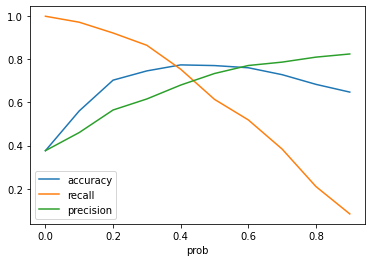

In [135]:
# Let's plot accuracy recall and precision for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','recall','precision'])
plt.show()

### Thus 0.4 seems to be optimal cutoff in favour of recall.

In [136]:
# Recreating column 'predicted' with 1 if Conversion_Prob > 0.4 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.030279,1253,0,1,0,0,0,0,0,0,0,0,0
1,0,0.406124,4989,1,1,1,1,1,1,0,0,0,0,0
2,0,0.569214,7462,1,1,1,1,1,1,1,0,0,0,0
3,0,0.374800,6357,0,1,1,1,1,0,0,0,0,0,0
4,0,0.347183,5515,0,1,1,1,1,0,0,0,0,0,0


In [137]:
#Score column
y_train_pred_final['Score'] = y_train_pred_final.Conversion_Prob.map(lambda x: int(100*x))

In [138]:
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Score
0,0,0.030279,1253,0,1,0,0,0,0,0,0,0,0,0,3
1,0,0.406124,4989,1,1,1,1,1,1,0,0,0,0,0,40
2,0,0.569214,7462,1,1,1,1,1,1,1,0,0,0,0,56
3,0,0.374800,6357,0,1,1,1,1,0,0,0,0,0,0,37
4,0,0.347183,5515,0,1,1,1,1,0,0,0,0,0,0,34


In [139]:
#checking precision and recall and accuracy for cutoff 0.4
print("Train set final recall score = ",metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Train set final precision score = ",metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Train set final accuracy score = ",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Train set final recall score =  0.7543049139017219
Train set final precision score =  0.6808188021228203
Train set final accuracy score =  0.7743516761543326


In [140]:
#f1 score for train set
print("Train set final f1 score = ",metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Train set final f1 score =  0.7156804144251844


## Making prediction on test set now

In [141]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Do Not Email_No,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_India,Country_Other,Occupation_Unemployed,Course_objective_Better Career Prospects,Interview_guide_Yes,Last Notable Activity_Modified
5149,3,273,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1
3804,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
3593,4,295,4,0,1,0,0,1,1,0,0,1,0,1,1,1,0
6445,2,21,2,0,1,0,0,1,0,0,1,1,0,1,1,1,0
570,5,409,5,0,0,1,0,1,1,0,0,1,0,0,0,0,0


In [142]:
#Performing standardisation of numerical var by only transforming NOT fitting X_test

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Do Not Email_No,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_India,Country_Other,Occupation_Unemployed,Course_objective_Better Career Prospects,Interview_guide_Yes,Last Notable Activity_Modified
1253,-0.397063,-0.685611,-0.112838,0,0,1,0,0,0,0,0,1,0,1,1,0,1
4989,0.517146,-0.493623,-0.629559,0,1,0,0,1,0,0,1,1,0,1,1,0,0
7462,1.736090,-0.118789,3.504202,0,0,0,1,1,0,0,1,1,0,1,1,1,0
6357,-1.006535,-0.875770,-1.146279,1,0,0,0,1,0,0,0,0,0,0,0,0,0
5515,-0.397063,-0.619786,-0.112838,1,0,1,0,1,0,0,1,1,0,0,0,0,0


In [143]:
# Only taking columns present in X_train final features.
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Do Not Email_No,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Occupation_Unemployed,Last Notable Activity_Modified
5149,-0.376601,0,1,0,1,0,0,0,1
3804,-0.875770,0,0,0,1,1,0,0,1
3593,-0.336375,1,0,0,1,0,0,1,0
6445,-0.837373,1,0,0,1,0,1,1,0
570,-0.127931,0,1,0,1,0,0,0,0


In [144]:
#adding constant
X_test_sm = sm.add_constant(X_test)

In [145]:
#making prediction
y_test_pred = res.predict(X_test_sm)

In [146]:
#viewing the output
y_test_pred[:10]

5149    0.083705
3804    0.060057
3593    0.174740
6445    0.316788
570     0.193785
4129    0.060057
4939    0.060057
1856    0.868106
7635    0.037086
2211    0.227776
dtype: float64

In [147]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Let's see the head
y_pred_1.head()

,0
5149,0.083705
3804,0.060057
3593,0.174740
6445,0.316788
570,0.193785


In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [150]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [151]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [152]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [153]:
y_pred_final.head()

,Converted,LeadID,0
0,0,5149,0.083705
1,0,3804,0.060057
2,0,3593,0.174740
3,0,6445,0.316788
4,0,570,0.193785


In [154]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [155]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [156]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,5149,0,0.083705
1,3804,0,0.060057
2,3593,0,0.174740
3,6445,0,0.316788
4,570,0,0.193785


In [157]:
#mapping to our cutoff of 0.4
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [158]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,5149,0,0.083705,0
1,3804,0,0.060057,0
2,3593,0,0.174740,0
3,6445,0,0.316788,0
4,570,0,0.193785,0


In [159]:
#Score Column
y_pred_final['Score'] = y_pred_final.Conversion_Prob.map(lambda x: int(100*x))

In [162]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Score
0,5149,0,0.083705,0,8
1,3804,0,0.060057,0,6
2,3593,0,0.174740,0,17
3,6445,0,0.316788,0,31
4,570,0,0.193785,0,19


In [163]:
# We'll do final check of accuracy, precision and recall on test set.
#checking precision and recall and accuracy for cutoff 0.4
print("Test set final recall score = ",metrics.recall_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Test set final precision score = ",metrics.precision_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Test set final accuracy score = ",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Test set final recall score =  0.7575757575757576
Test set final precision score =  0.6825938566552902
Test set final accuracy score =  0.7683511619328661


# Comparisons between train and test set with cutoff 0.4:
<font color = red> Train set final recall score =  0.7543049139017219 <br>
Train set final precision score =  0.6808188021228203<br>
Train set final accuracy score =  0.7743516761543326  <br> <br> <font color = green>
Test set final recall score =  0.7575757575757576<br>
Test set final precision score =  0.6825938566552902<br>
Test set final accuracy score =  0.7683511619328661 </font>

In [164]:
# f1-score for test set
print("Test set final F1 score = ",metrics.f1_score(y_pred_final.Converted, y_pred_final.final_predicted))

Test set final F1 score =  0.7181328545780968
